In [1]:
#####################################################################
# Script Name	 : "Fallstudie_Verbrauch_Elektogeraete.ipynb"                                                                                         
# Description	 : Dataset from swiss open data gov, in which we will explore the sales and consumption of electrical appliances in Switzerland
# Args           : 
# Author       	 : Marc Kressig
# Email          : marc.kressig@ost.ch
# Date           : 21.10.2025
#####################################################################

Für die Datenanalyse habe ich den Datensatz „ogd109_absatz_verbrauch_elektrogeraete“ aus dem Open Government Data (OGD) Portal der Schweiz ausgewählt. Der Datensatz enthält Informationen zum Absatz und Verbrauch von Elektrogeräten in der Schweiz und zeigt, wie sich diese Kennzahlne über verschiedene Jahre und Gerätekategorien hinweg entwickeln.

Für mich besonders interessant, sind die Einblicke in das Konsumverhalten, Nachhaltigkeit wie auch die technologischen Entwicklungen, die es über die Jahre hinweg gegeben hat.

In [ ]:
# import section
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option("display.max_columns", 500)

# Datenset als grt hineinladen
grt = pd.read_csv("C:\\Users\\marck\\Documents\\_OST\\DAANA\\DAANA\\own_case\\ogd109_absatz_verbrauch_elektrogeraete.csv").dropna()
display(grt.head())

print("Überpüfe den Datensatz auf fehlende Werte")
print(grt.isnull().sum())
print()
print("Anzahl der NA-Werte im Datensatz")
print(grt.isnull().sum().sum())
print()

,Jahr,Quelle,Geraetekategorie,Neugeraeteabsatz_Stk,Geraetebestand_Stk,Verbrauch_Neugeraete_kWh,Verbrauch_Geraetebestand_kWh
0,2002,FEA,Elektroherde und Einbaubacköfen,268400.0,2907854.0,93030925.0,1.327149e+09
1,2002,FEA,Geschirrspüler,159274.0,1751301.0,36970000.0,5.040957e+08
2,2002,FEA,Kühlschränke,257100.0,3959165.0,72752000.0,1.212396e+09
3,2002,FEA,Tiefkühlschränke,82700.0,1163988.0,25260000.0,3.667851e+08
4,2002,FEA,Wäschetrockner,79146.0,1056823.0,42260000.0,6.440320e+08


Überpüfe den Datensatz auf fehlende Werte
Jahr                            0
Quelle                          0
Geraetekategorie                0
Neugeraeteabsatz_Stk            0
Geraetebestand_Stk              0
Verbrauch_Neugeraete_kWh        0
Verbrauch_Geraetebestand_kWh    0
dtype: int64

Anzahl der NA-Werte im Datensatz
0



In [3]:
# Dataset weiter bereinigen

# grt.columns = (
#     grt.columns
#     .str.strip()            # Leerschläge entfernen
#     .str.lower()            # in lowercase umwandeln
#     .str.replace(" ", "_")
#     .str.replace("-", "_") 
#     )

Folgende Fragestellung soll beantwortet werden:
## Wie hat sich der Absatz und Verbrauch von Elektrogeräten in der Schweiz zwischen 2002 und 2021 entwickelt? Welche Trends lassen sich erkennen?

Anzahl verschieden Jahre: 20



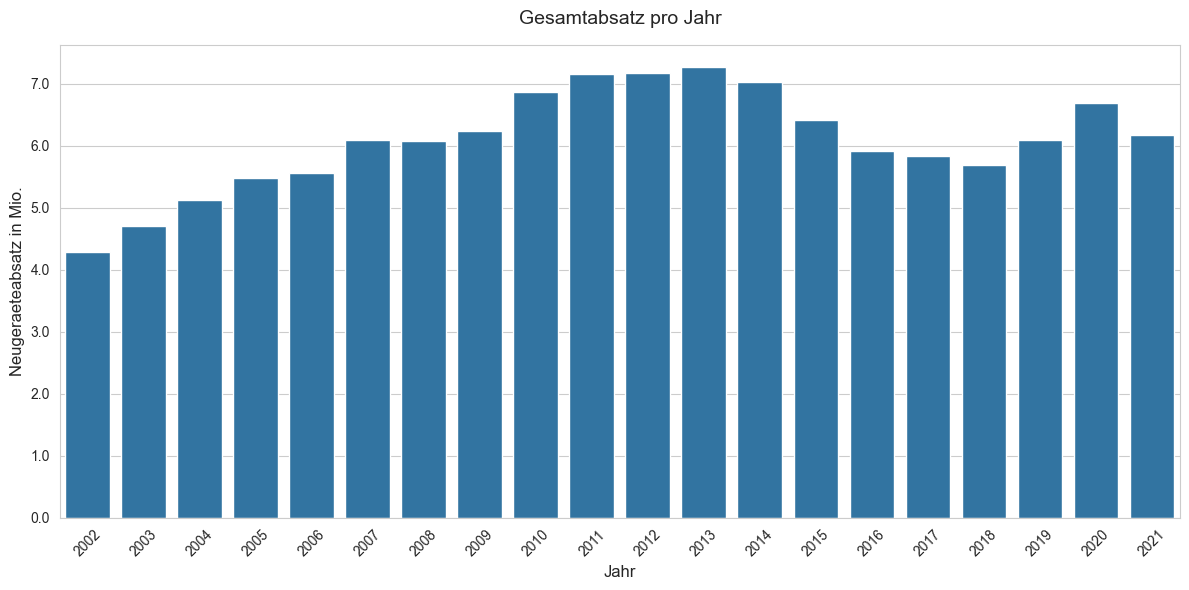

In [9]:
# Anzahl der verschiedenen Jahre im Datensatz
n_years = grt["Jahr"].nunique() # unique elements ausgeben

print(f"Anzahl verschieden Jahre: {n_years}")
# print("Jahre im Datensatz:", years)
print()

# Plot
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(
    data=grt,
    x="Jahr",
    y="Neugeraeteabsatz_Stk",
    estimator=sum,
    errorbar=None) # confidence intervall

# customize plot
plt.title("Gesamtabsatz pro Jahr", fontsize=14, pad=15)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Neugeraeteabsatz in Mio.", fontsize=12)
plt.xticks(rotation=45)

def millions_formatter(x, pos):
    return f"{x/1000000:.1f}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

plt.tight_layout()
plt.show()

Wir können an Hand dem Gesamtabsatz-plot sehen, dass in den Jahren 2012 und 2013 die meisten Neugeräte gekauft wurden.
Dassselbe gilt fürs Jahr 2019, wobei dies auf die Pandemie zurückzuschliessen ist, dabei hatten viele Bürger Zeit und Geld zur Verfügung.

<Figure size 3000x700 with 0 Axes>

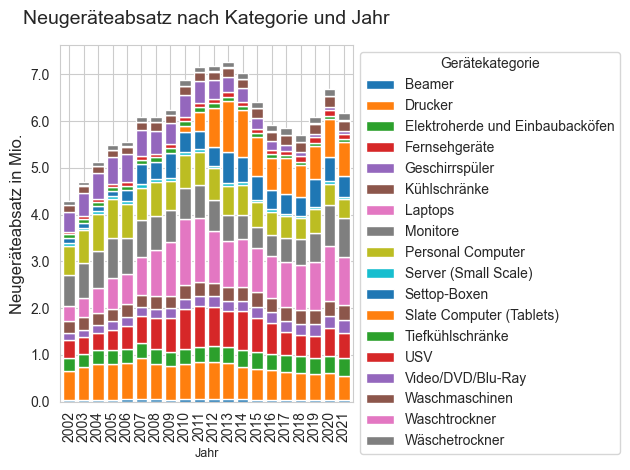

In [13]:
# Plot: Neugeräteabsatz nach Kategorie und Jahr
plt.figure(figsize=(30, 7))
sales_by_category = grt.pivot_table(
    values="Neugeraeteabsatz_Stk",
    index="Jahr",
    columns="Geraetekategorie",
    aggfunc="sum"
)

ax = sales_by_category.plot(
    kind="bar",
    stacked=True,
    width=0.8
)

# Plot anpassen an Schriftgrösse und Stil
plt.title("Neugeräteabsatz nach Kategorie und Jahr", fontsize=14, pad=15)
plt.xlabel("Jahr", fontsize=9)
plt.xticks(rotation=90)
plt.ylabel("Neugeräteabsatz in Mio.", fontsize=12)
plt.legend(title="Gerätekategorie", bbox_to_anchor=(1.0, 1), loc="upper left")

# Format y-axis to show values in millions
def millions_formatter(x, pos):
    return f"{x/1000000:.1f}"
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(millions_formatter))

plt.tight_layout()
# plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust the plot area to leave space for legend
plt.show()

Top 5 Gerätekategorien (Gesamtabsatz 2002-2021)
Geraetekategorie
Laptops              18360000.0
Drucker              13931000.0
Monitore             13409750.0
Personal Computer    12348000.0
Fernsehgeräte        12089187.0
Name: Neugeraeteabsatz_Stk, dtype: float64

Vergleich 2002 vs. 2021
Gesamtabsatz 2002: 4,292,629
Gesamtabsatz 2021: 6,168,660
Veränderung: 43.7%



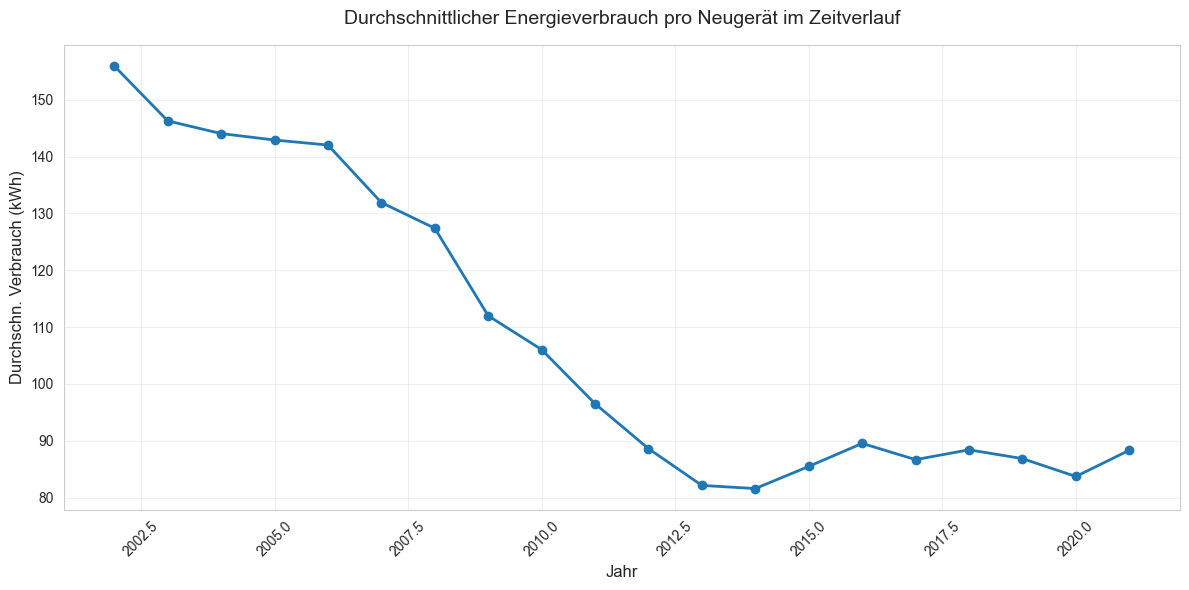

In [6]:
# Top 5 Gerätekategorien nach Absatz
print("Top 5 Gerätekategorien (Gesamtabsatz 2002-2021)")
top_categories = grt.groupby("Geraetekategorie")["Neugeraeteabsatz_Stk"].sum().sort_values(ascending=False).head()
print(top_categories)
print()

# 3. Entwicklung des durchschnittlichen Verbrauchs pro Neugerät
grt["Verbrauch_pro_Geraet"] = grt["Verbrauch_Neugeraete_kWh"] / grt["Neugeraeteabsatz_Stk"]

# 4. Vergleich: Erstes vs. Letztes Jahr
print("Vergleich 2002 vs. 2021")
jahr_2002 = grt[grt["Jahr"] == 2002]["Neugeraeteabsatz_Stk"].sum()
jahr_2021 = grt[grt["Jahr"] == 2021]["Neugeraeteabsatz_Stk"].sum()
veraenderung = ((jahr_2021 - jahr_2002) / jahr_2002) * 100
print(f"Gesamtabsatz 2002: {jahr_2002:,.0f}")
print(f"Gesamtabsatz 2021: {jahr_2021:,.0f}")
print(f"Veränderung: {veraenderung:.1f}%")
print()

# 5. Energieeffizienz-Trend visualisieren
fig, ax = plt.subplots(figsize=(12, 6))

efficiency_by_year = grt.groupby("Jahr").agg({
    "Verbrauch_Neugeraete_kWh": "sum",
    "Neugeraeteabsatz_Stk": "sum"
}).reset_index()

efficiency_by_year["Avg_Verbrauch"] = (
    efficiency_by_year["Verbrauch_Neugeraete_kWh"] / 
    efficiency_by_year["Neugeraeteabsatz_Stk"]
)

ax.plot(efficiency_by_year["Jahr"], 
        efficiency_by_year["Avg_Verbrauch"], 
        marker="o", 
        linewidth=2)

ax.set_title("Durchschnittlicher Energieverbrauch pro Neugerät im Zeitverlauf", 
             fontsize=14, pad=15)
ax.set_xlabel("Jahr", fontsize=12)
ax.set_ylabel("Durchschn. Verbrauch (kWh)", fontsize=12)
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

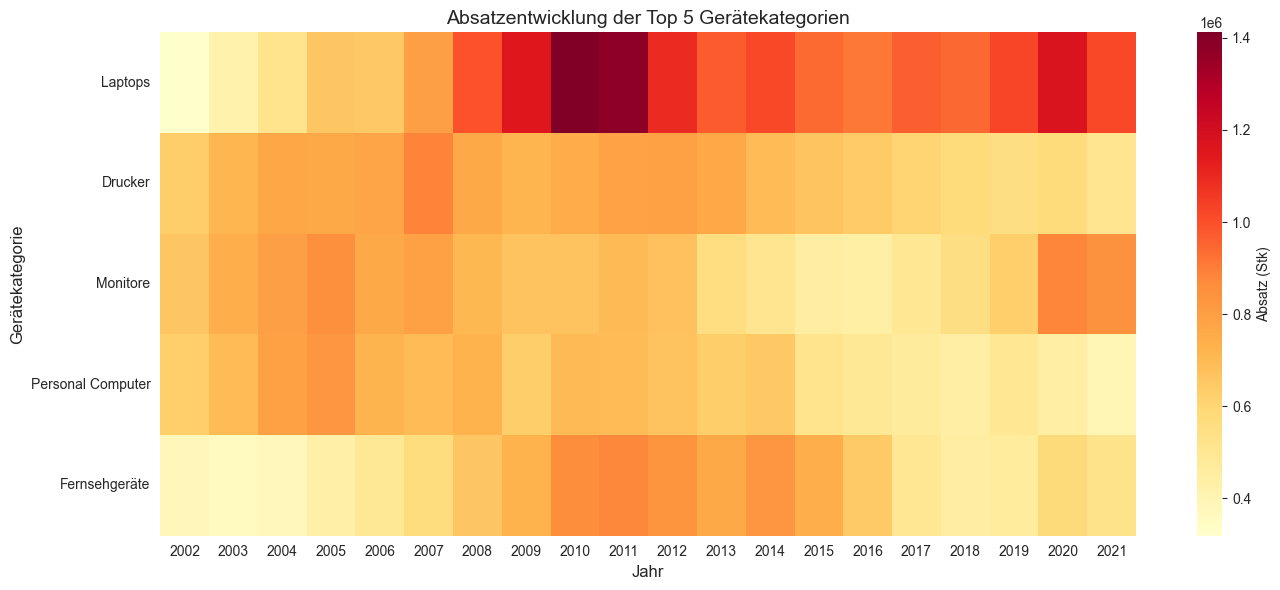

Korrelation zwischen Absatz und Verbrauch
                          Neugeraeteabsatz_Stk  Verbrauch_Neugeraete_kWh  \
Neugeraeteabsatz_Stk                  1.000000                  0.168089   
Verbrauch_Neugeraete_kWh              0.168089                  1.000000   
Geraetebestand_Stk                    0.844470                  0.340688   

                          Geraetebestand_Stk  
Neugeraeteabsatz_Stk                0.844470  
Verbrauch_Neugeraete_kWh            0.340688  
Geraetebestand_Stk                  1.000000  


In [14]:
# Heatmap: Gerätekategorien über Jahre
pivot_data = grt.pivot_table(
    values="Neugeraeteabsatz_Stk",
    index="Geraetekategorie",
    columns="Jahr",
    aggfunc="sum",
    fill_value=0
)

# Nur die wichtigsten Kategorien anzeigen
top_categories_list = top_categories.index.tolist()
pivot_data_top = pivot_data.loc[top_categories_list]

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data_top, 
            annot=False, 
            fmt=".0f", 
            cmap="YlOrRd",
            cbar_kws={"label": "Absatz (Stk)"})
plt.title("Absatzentwicklung der Top 5 Gerätekategorien", fontsize=14)
plt.xlabel("Jahr", fontsize=12)
plt.ylabel("Gerätekategorie", fontsize=12)
plt.tight_layout()
plt.show()

# Korrelationsanalyse
print("Korrelation zwischen Absatz und Verbrauch")
correlation = grt[["Neugeraeteabsatz_Stk", 
                   "Verbrauch_Neugeraete_kWh", 
                   "Geraetebestand_Stk"]].corr()
print(correlation)

Folgende Erkenntnisse über die Vorhergehenden Plots:
Im Jahr 2020/2021 zeigt sich bei mehreren Kategorien ein Anstieg (Home-Office-Effekt während COVID-19), besonders bei Monitoren und Fernsehgeräten.

Ab etwa 2015 lässt sich dann ein leichter Rückgang bei energieintensiven Geräten erkennen, was möglicherweise auf verbesserte Energieeffizienz 
und längere Nutzungsdauern zurückzuführen ist.

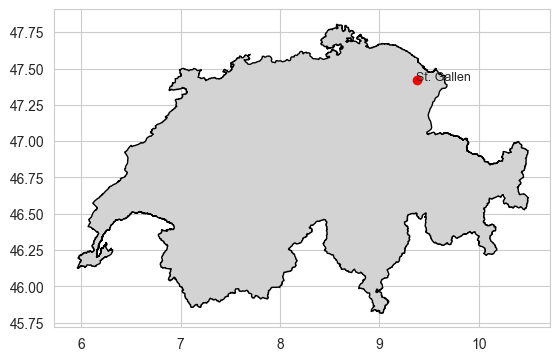

In [ ]:
# Regionen auf shapefile anzeigen lassen

# Wäre spannend wenn man geodaten im Dataset hätte

# import geopandas as gpd
# gdf = gpd.read_file("C:\\Users\\marck\\Documents\\_OST\\APROG\\open_datasg\\CHE_ADM0.shp")

# # Karte zeichnen
# gdf.plot(color="lightgray", edgecolor="black")
# # plt.scatter(8.5417, 47.3769, color="red") #ZH
# # plt.text(8.55, 47.38, "Zürich", fontsize=9)
# plt.scatter(9.3767, 47.4239 ,color="red") #SG
# # plt.
# plt.text(9.37, 47.42, "St. Gallen", fontsize=9)
# plt.show()